## Objective: 

Develop a predictive model using machine learning to detect customer churn in a financial institution. This model aims to reduce revenue loss by identifying potential churn and enabling proactive customer retention strategies. Ultimately, it enhances business performance by mitigating customer attrition.

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset

df = pd.read_csv('Churn_Modelling.csv')

df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6456,6457,15755978,Tseng,606,France,Male,31,10,0.00,2,1,0,195209.40,0
5238,5239,15660840,Kalinin,723,France,Male,30,3,124119.54,1,1,0,162198.32,0
8185,8186,15812356,Doherty,722,Germany,Female,40,6,89175.06,2,0,1,152883.95,0
483,484,15578186,Pirozzi,486,Germany,Male,37,9,115217.99,2,1,0,144995.33,0
8216,8217,15637717,Lockington,704,Germany,Male,41,4,109026.80,2,1,1,43117.10,0


## Dataset Info: The dataset provided consists of the following features-

- CustomerId: Unique identifier for each customer
- Surname: Surname of the customer
- CreditScore: Credit score of the customer
- Geography: Customer's country of residence
- Gender: Customer's gender
- Age: Age of the customer
- Tenure: Number of years the customer has been with the institution
- Balance: Bank account balance of the customer
- NumOfProducts: Number of products/services the customer has subscribed to
- HasCrCard: Whether the customer has a credit card (1 if yes, 0 if no)
- IsActiveMember: Whether the customer is an active member (1 if yes, 0 if no)
- EstimatedSalary: Estimated salary of the customer
- Exited: Whether the customer has churned (1 if yes, 0 if no)

In [3]:
# DataFrame's structure and attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# identify duplicated rows

df.duplicated().sum()

0

In [5]:
# count missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# number of unique values for each column in a DataFrame 

df.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Find features with one value

for column in df.columns:
    print(column,df[column].nunique())

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


## My findings - 

- Dataset is consist of 10000 instances and 14 attributes
- most of the features are numerical 
- no null values are found in the dataset 
- no duplicated values 
- all the values are unique 
- There are no features with one values, at least 2 values. 



# Exploratory Data Analysis and Pre-Processing

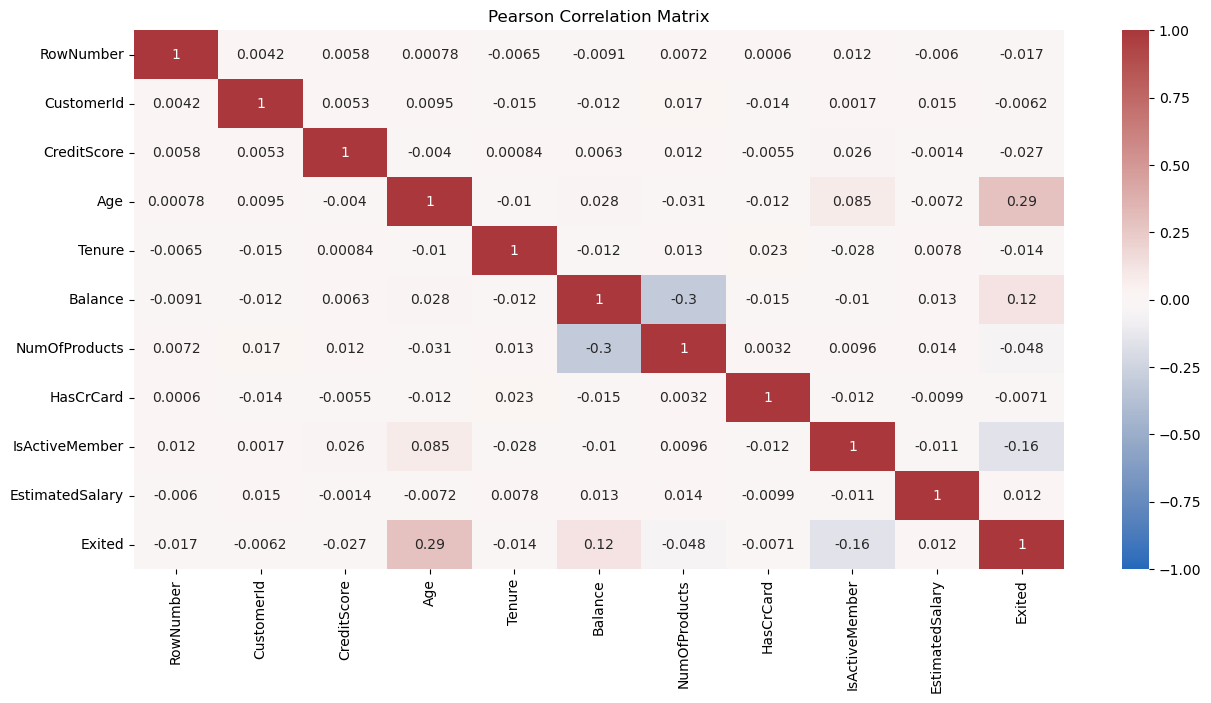

In [11]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Create a heatmap to visualize the correlations
fig = plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix,annot=True, vmin= -1, vmax = 1, center = 0, cmap = 'vlag')
plt.title("Pearson Correlation Matrix")
plt.show()

### My findings - 

- We don't need the row number, customer id and surname column. So. going to drop these column. 



# Dropping columns that doesn't contribute meaningfully to the prediction. 

In [15]:
# data cleaning 

df1 = df.copy()

df1 = df1.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [17]:
# statistics for all numerical columns

df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Visualizing the Output variable - EXITED

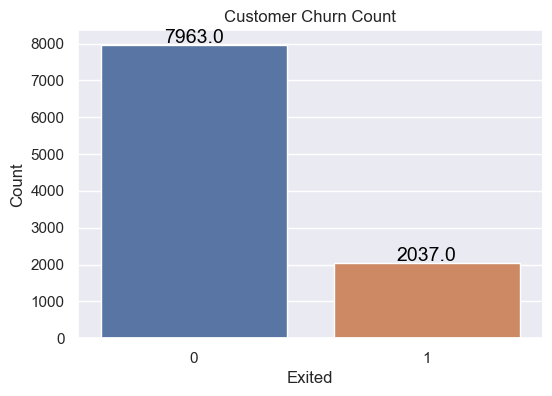

In [28]:
# Create a count plot for the 'exited' column
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
ax = sns.countplot(data=df1, x="Exited")

# Add count labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title("Customer Churn Count")
plt.xlabel("Exited")
plt.ylabel("Count")

# Show the plot
plt.show()

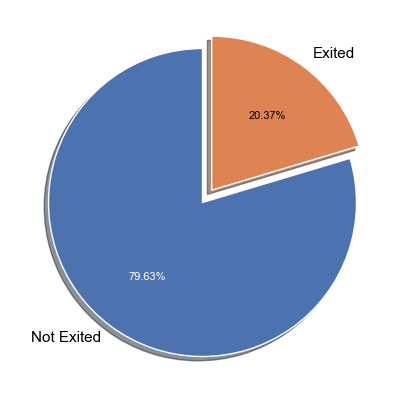

In [25]:
# visualizing the output variable 

values = df1.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)
explode = (0, 0.10)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

# Histogram for all features 

- Discrete variables: Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember
- Continuous variables: CreditScore, Age, Balance, EstimatedSalary

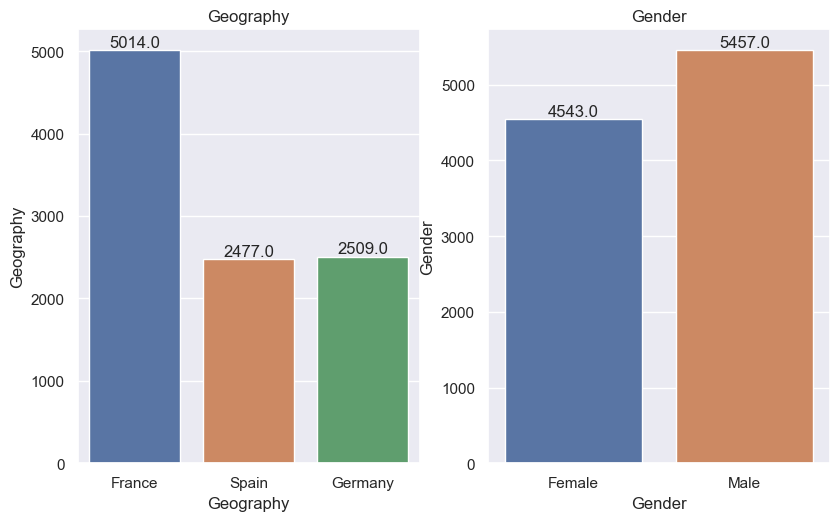

In [42]:
# check count based on categorical features

plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for categorical_feature in categorical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(x=categorical_feature, data=df1)
    plt.ylabel(categorical_feature)
    plt.title(categorical_feature)
    
    # Add number counts on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
    plotnumber += 1

plt.show()

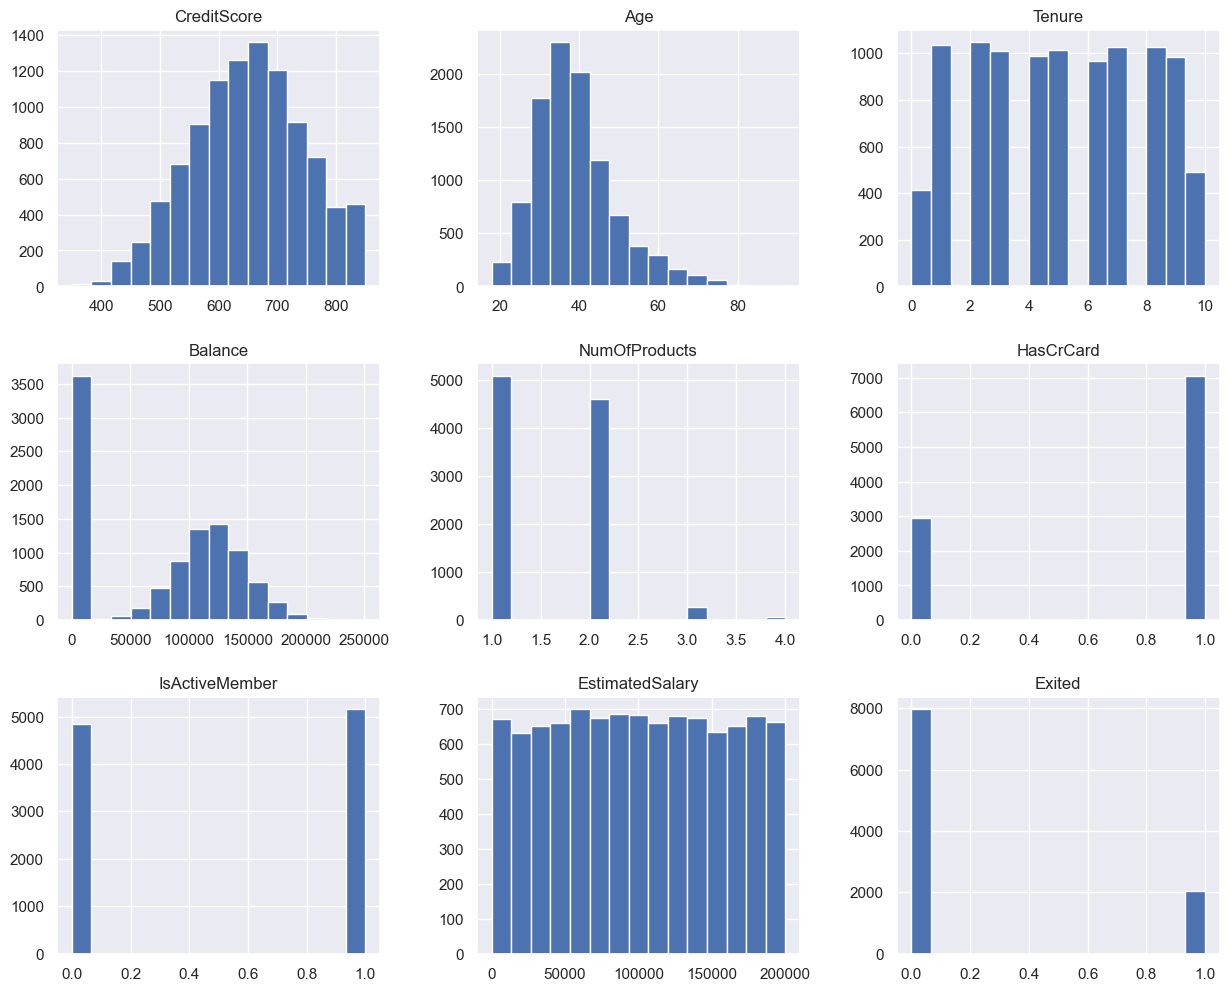

In [44]:
# check count based on numerical features

df1.hist(figsize=(15,12), bins = 15)
plt.show()

## My findings - 

- Age is slightly right-skewed. so there could be some pattern across two groups.
- Balance is fairly normally distributed except when balance=0.
- Most credit scores are over 600, so it is possible that some high quality customer churned.
- Estimated Salary is spread across various values.
- Most customers have a credit card with the bank.
- Around half customers are active while half are not.
- Most customers have less than two products (majority has 1).
- Tenure of customers are also fairly spread out, concentrating between 2-8 years.


# Exploring the numerical and categorical features- 


## Categorical features

In [30]:
# Explore the catagorical features 

categorical_features=[feature for feature in df1.columns if ((df1[feature].dtypes=='O') & (feature not in ['Exited']))]
categorical_features

['Geography', 'Gender']

In [31]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Geography and number of categories are 3
The feature is Gender and number of categories are 2


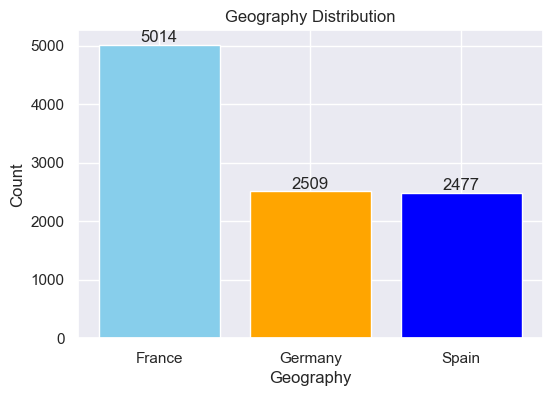

In [38]:
# Count the number of occurrences of each category in the 'geography' column
geography_counts = df1['Geography'].value_counts()

# Define three different colors
colors = ['skyblue', 'orange', 'blue']

# Create a bar chart with colors and number counts
plt.figure(figsize=(6, 4))  
plt.bar(geography_counts.index, geography_counts, color=colors)

# Customize the plot
plt.title("Geography Distribution")
plt.xlabel("Geography")
plt.ylabel("Count")

# Add number counts on top of each bar
for x, y in enumerate(geography_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show the plot
plt.show()

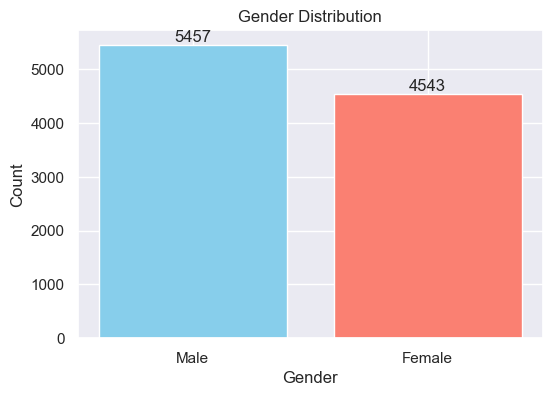

In [39]:
# Count the number of occurrences of each category in the 'Gender' column
gender_counts = df1['Gender'].value_counts()

# Define two different colors
colors = ['skyblue', 'salmon']

# Create a bar chart with colors and number counts
plt.figure(figsize=(6, 4))  
plt.bar(gender_counts.index, gender_counts, color=colors)

# Customize the plot
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add number counts on top of each bar
for x, y in enumerate(gender_counts):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Show the plot
plt.show()

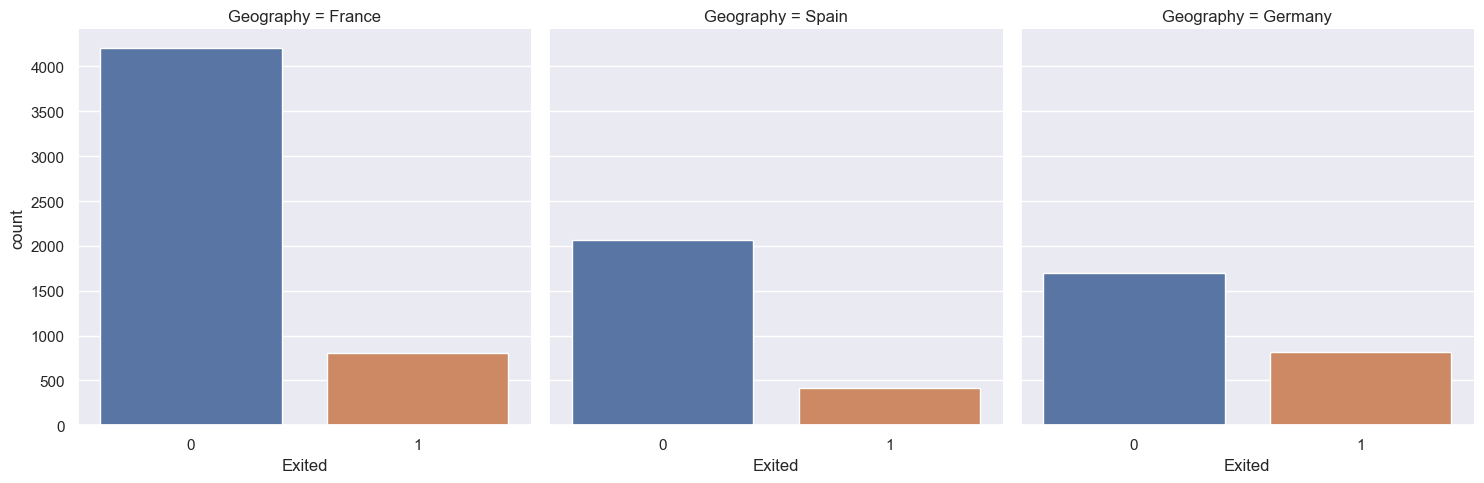

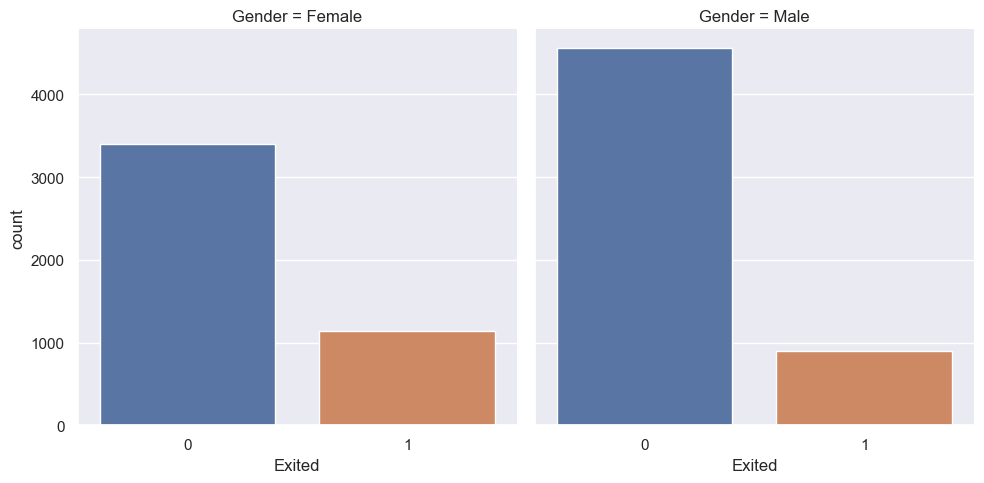

In [40]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='Exited', col=categorical_feature, kind='count', data= df1)
plt.show()

## Numerical features - 

In [45]:
# list of numerical variables
numerical_features = [feature for feature in df1.columns if ((df1[feature].dtypes != 'O') & (feature not in ['Exited']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df1[numerical_features].head()

Number of numerical variables:  8


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [46]:
# Find discreate numerical features 

discrete_features=[feature for feature in numerical_features if len(df1[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 4


In [47]:
# Find Continuous numerical features 
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['Exited']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


## Continuous variables 

- Histograms and Boxplot of CreditScore, Age, Balance, EstimatedSalary

In [49]:
def plot_continuous(df, variable, hue_choice, palette_choice=None):
   
    g = sns.FacetGrid(df, hue=hue_choice, sharex=True, sharey=True, palette=palette_choice, height=6, aspect=2)
    g = g.map(plt.hist, variable, bins=40, alpha=0.7).add_legend()
    
    
'''Function to plot the distribution of a specified variable by class in histogram.
    
Args:
    df (DataFrame): A DataFrame with values to plot.
    variable (str): Variable of interest.
    hue_choice (str): Variable which splits data into classes.
    palette_choice (str, optional): Color on bins. Defaults to None.
'''
    

'Function to plot the distribution of a specified variable by class in histogram.\n    \nArgs:\n    df (DataFrame): A DataFrame with values to plot.\n    variable (str): Variable of interest.\n    hue_choice (str): Variable which splits data into classes.\n    palette_choice (str, optional): Color on bins. Defaults to None.\n        '

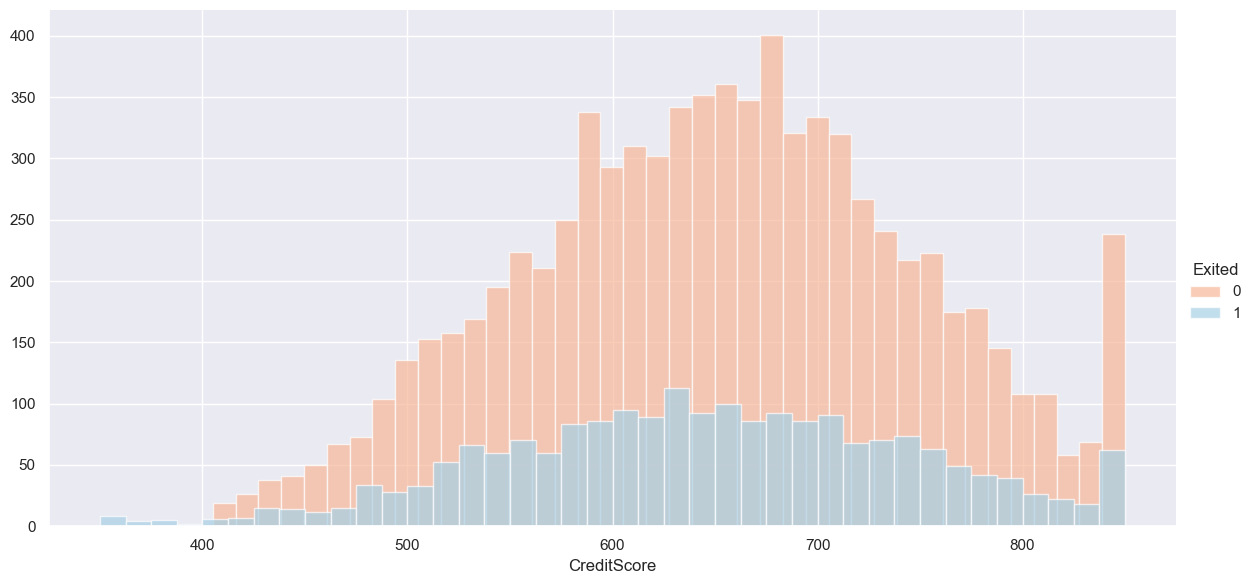

In [52]:
# CreditScore

plot_continuous(df1, 'CreditScore', 'Exited', "RdBu")


<Axes: xlabel='Exited', ylabel='CreditScore'>

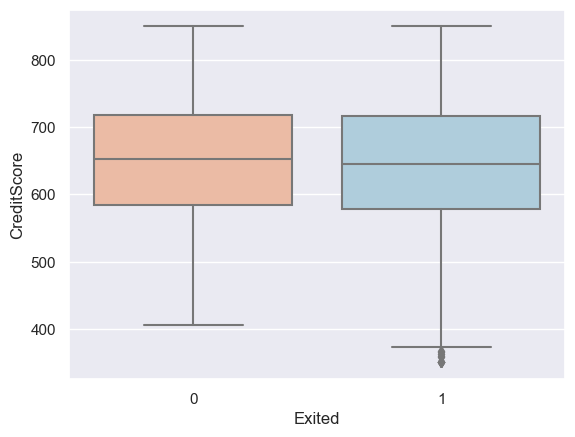

In [53]:
sns.boxplot(x='Exited', y='CreditScore', data=df1, palette="RdBu")

## Credit score 

- The overall distribution is similar between two groups, but churned customers exhibit a left-tail with both extremely low and high credit scores.

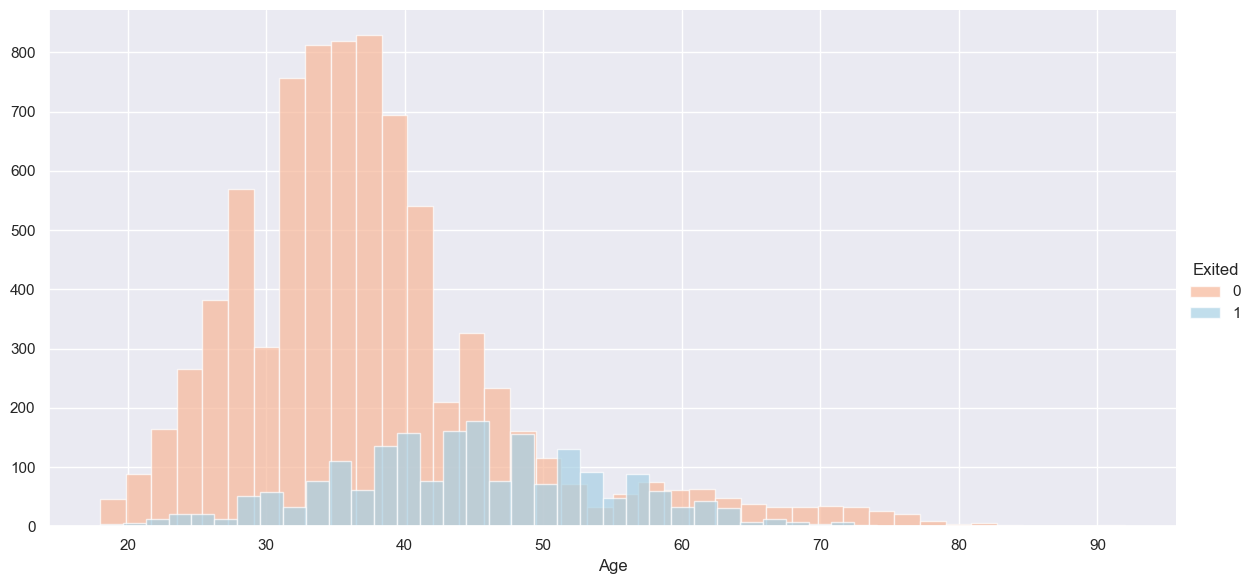

In [54]:
# Age 

plot_continuous(df1, 'Age', 'Exited', "RdBu")

<Axes: xlabel='Exited', ylabel='Age'>

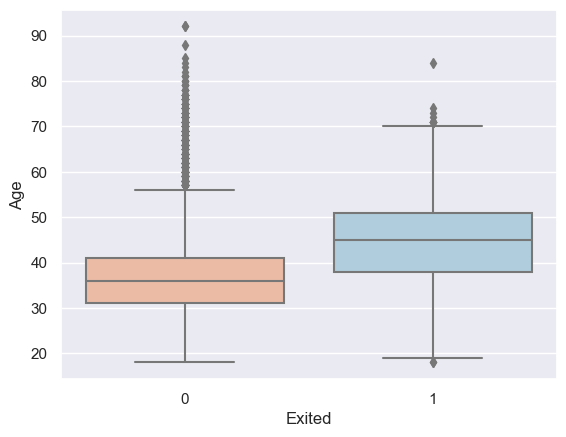

In [55]:
sns.boxplot(x='Exited', y='Age', data=df1, palette="RdBu")

## Age 

- Active customers have a right skewed distribution, with potential outliers aged over 60, indicating service stability, while churned customers cluster around 40-50, possibly due to family support and retirement considerations.

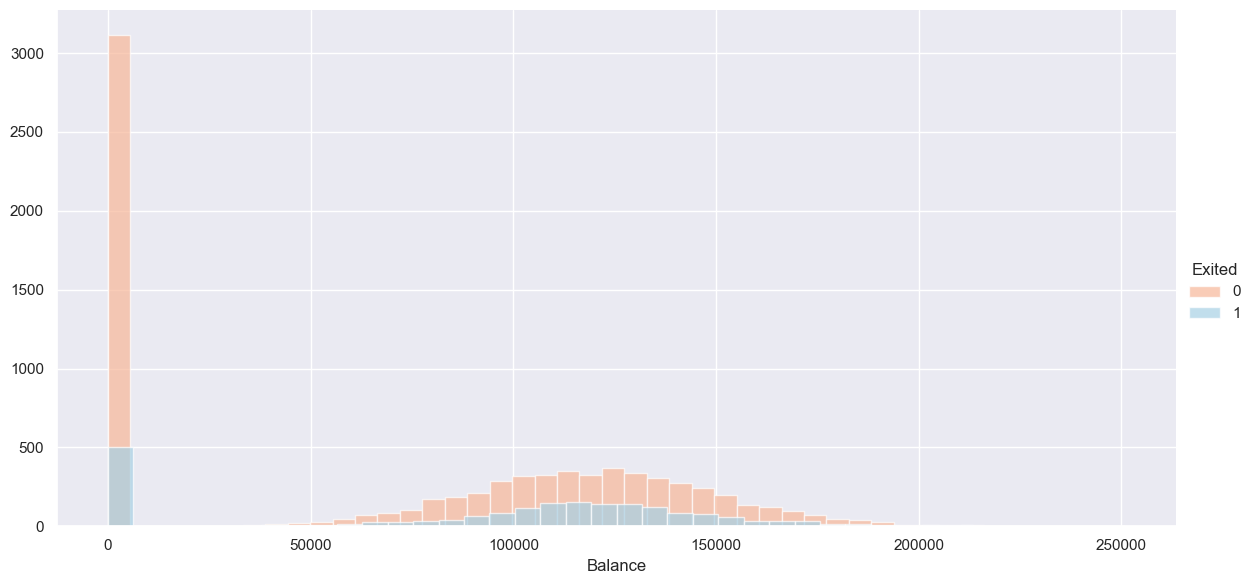

In [56]:
# Balance

plot_continuous(df1, 'Balance', 'Exited', "RdBu")

<Axes: xlabel='Exited', ylabel='Balance'>

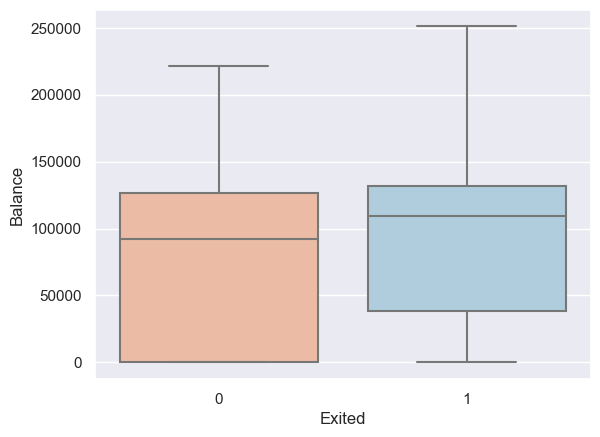

In [57]:
sns.boxplot(x='Exited', y='Balance', data=df1, palette="RdBu")

## Balance 

- Overall distribution is similar, with some active customers having low balances.

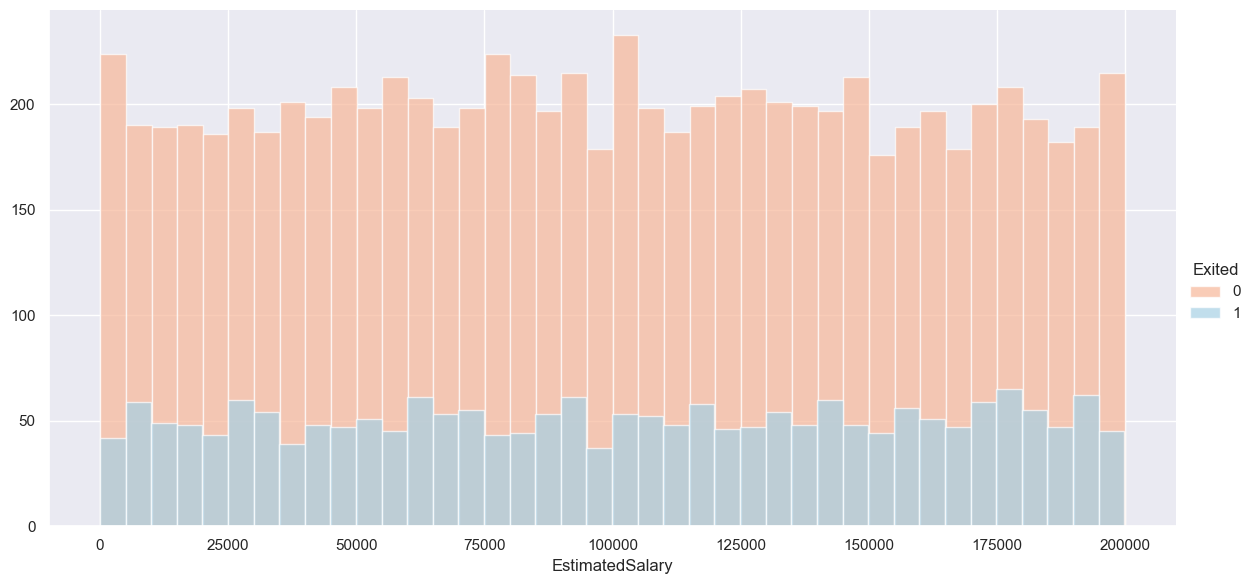

In [58]:
# EstimatedSalary

plot_continuous(df1, 'EstimatedSalary', 'Exited', "RdBu")

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

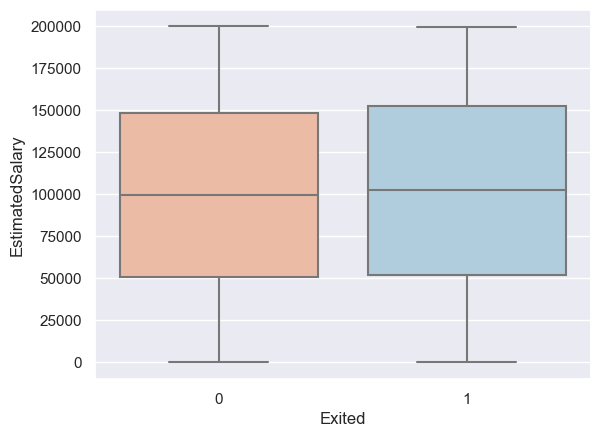

In [59]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df1, palette="RdBu")

## EstimatedSalary

- Similar trends observed across both groups, suggesting that estimated salary may not be a decisive factor.

# Discrete variables 

- Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember
- Distribution by Count and by Proportion

In [64]:
def plot_discrete(df, variable, hue_choice, palette_choice=None):
    
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    ax = sns.countplot(data=df1, x=variable, palette=palette_choice, hue=hue_choice)
    plt.title('%s of Customers by Customer Type' % variable)
    
    # Add number counts on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.show()


In [61]:
def plot_discrete_prop(df, variable, hue_choice, palette_choice=None):
   
    prop_df = (df1[variable]
           .groupby(df1[hue_choice])
           .value_counts(normalize=True)
           .rename('Proportion')
           .reset_index())
    sns.barplot(x=variable, y='Proportion', hue=hue_choice, data=prop_df, palette=palette_choice)
    plt.title('Proportional Distribution of %s by Customer Type' % variable)


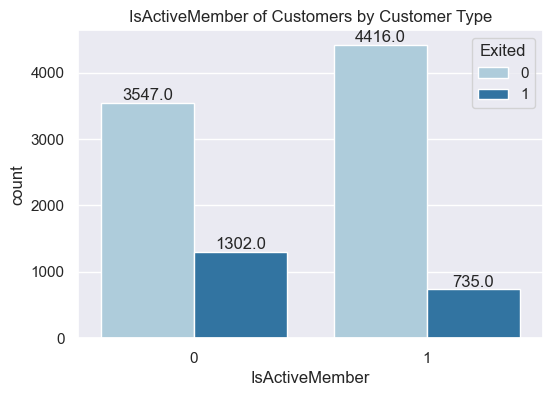

In [67]:
# IsActiveMember

plot_discrete(df1, 'IsActiveMember', 'Exited', 'Paired')

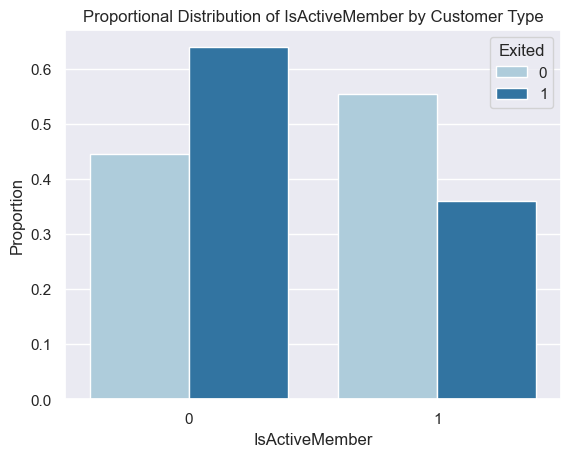

In [63]:
plot_discrete_prop(df=df1, variable='IsActiveMember', hue_choice='Exited', palette_choice='Paired')

## IsActiveMember

- Churned customers tend to be inactive members.

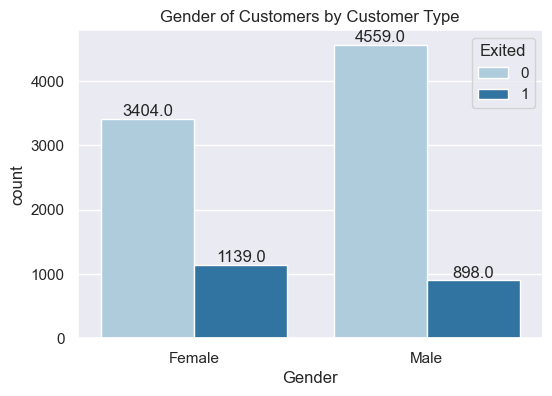

In [68]:
# Gender

plot_discrete(df1, 'Gender', 'Exited', 'Paired')

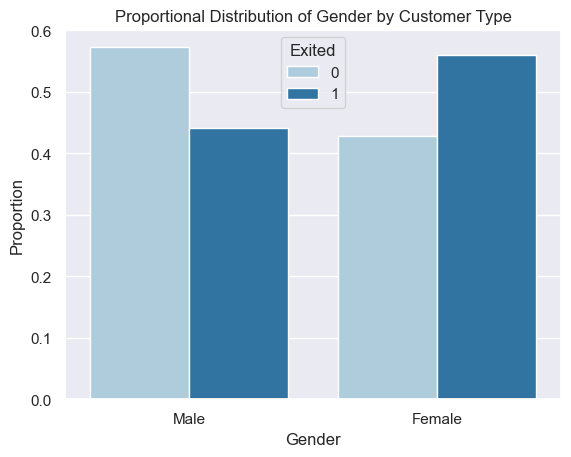

In [69]:
plot_discrete_prop(df=df1, variable='Gender', hue_choice='Exited', palette_choice='Paired')

## Gender 

- Most of the members who churned are females. 

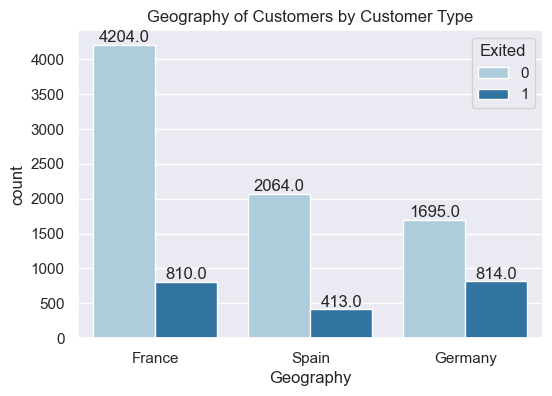

In [70]:
# Geography

plot_discrete(df1, 'Geography', 'Exited', 'Paired')

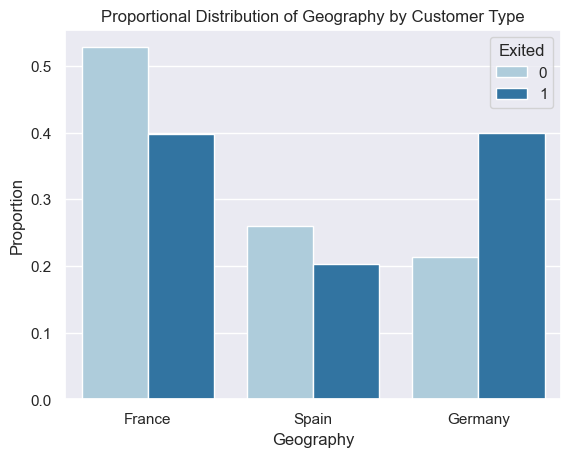

In [71]:
plot_discrete_prop(df=df1, variable='Geography', hue_choice='Exited', palette_choice='Paired')

# Geography 

- Most of the customers who churned are from Germany. 
- The majority of customers are French, with a higher proportion of French and German customers among the churned group.

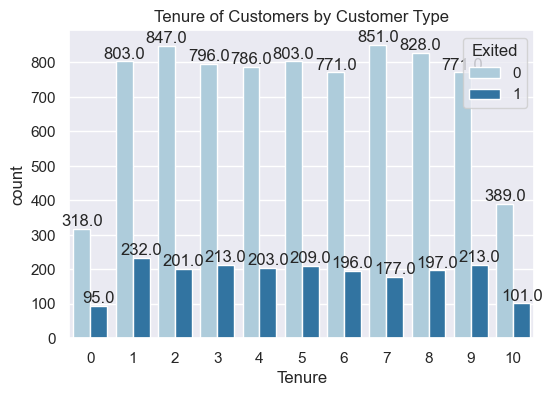

In [72]:
# Tenure

plot_discrete(df1, 'Tenure', 'Exited', 'Paired')

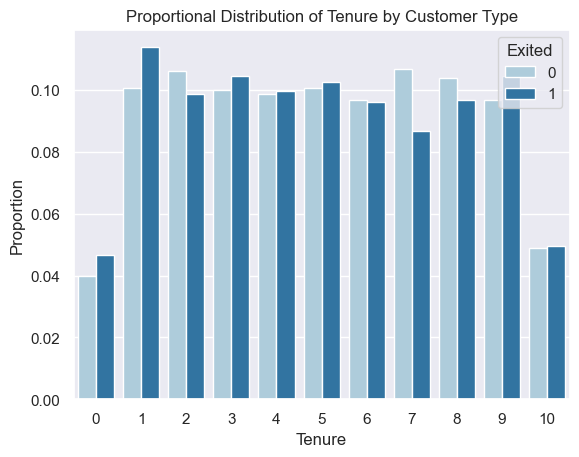

In [73]:
plot_discrete_prop(df=df1, variable='Tenure', hue_choice='Exited', palette_choice='Paired')

## Tenure

- Among churned customers, there is a mix of both new and long-term customers. 

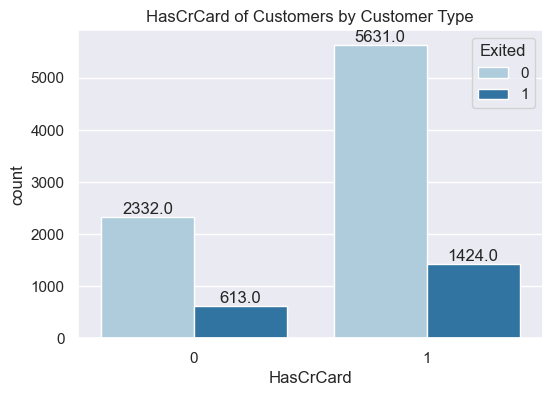

In [74]:
# HasCrCard

plot_discrete(df1, 'HasCrCard', 'Exited', 'Paired')

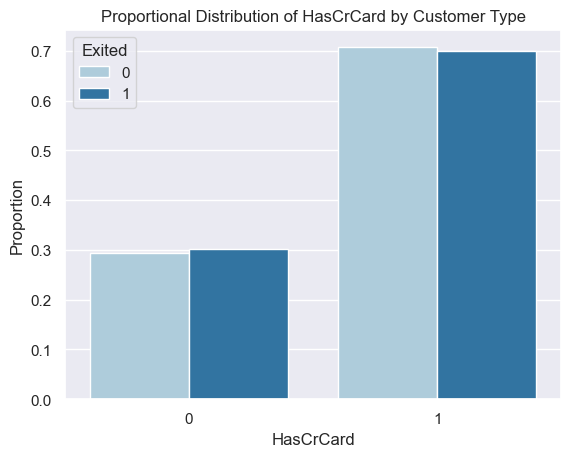

In [75]:
plot_discrete_prop(df=df1, variable='HasCrCard', hue_choice='Exited', palette_choice='Paired')

## HasCrCard

- Distributed almost similarly. 

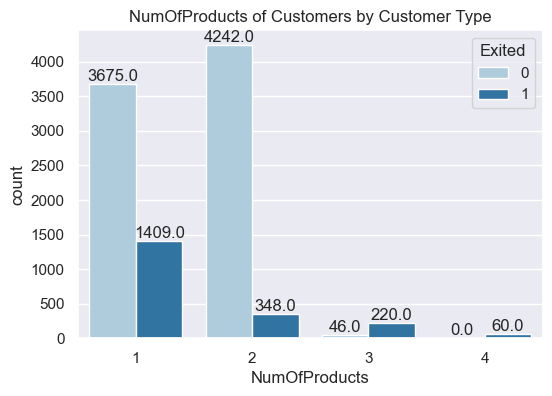

In [76]:
# NumOfProducts

plot_discrete(df1, 'NumOfProducts', 'Exited', 'Paired')

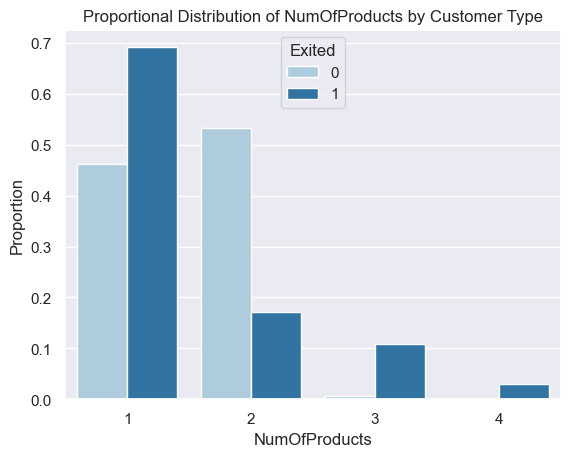

In [77]:
plot_discrete_prop(df=df1, variable='NumOfProducts', hue_choice='Exited', palette_choice='Paired')

## NumOfProducts

- Churned customers' exploration of multiple products before deciding to leave may signal product-related issues within the bank.